In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
spotify_data = pd.read_csv('spotify52kData.csv')
spotify_data.head(), spotify_data.columns

(   songNumber                 artists  \
 0           0             Gen Hoshino   
 1           1            Ben Woodward   
 2           2  Ingrid Michaelson;ZAYN   
 3           3            Kina Grannis   
 4           4        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration  explicit  danceability  \
 0                      Comedy          73    230666     False         0.676   
 1            Ghost - Acoustic          55    149610     False         0.420   
 2              To Begin Again          57    210826     False         0.438   
 3  Can't Help Falling In Love          71    201933     False         0.266   
 4

Data Preprocessing / Cleaning

In [ ]:
#Remove rows with any missing values
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
clean_data = spotify_data.dropna(subset=features)

Consider the 10 song features duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo. Is any of these features reasonably distributed normally? If so, which one?

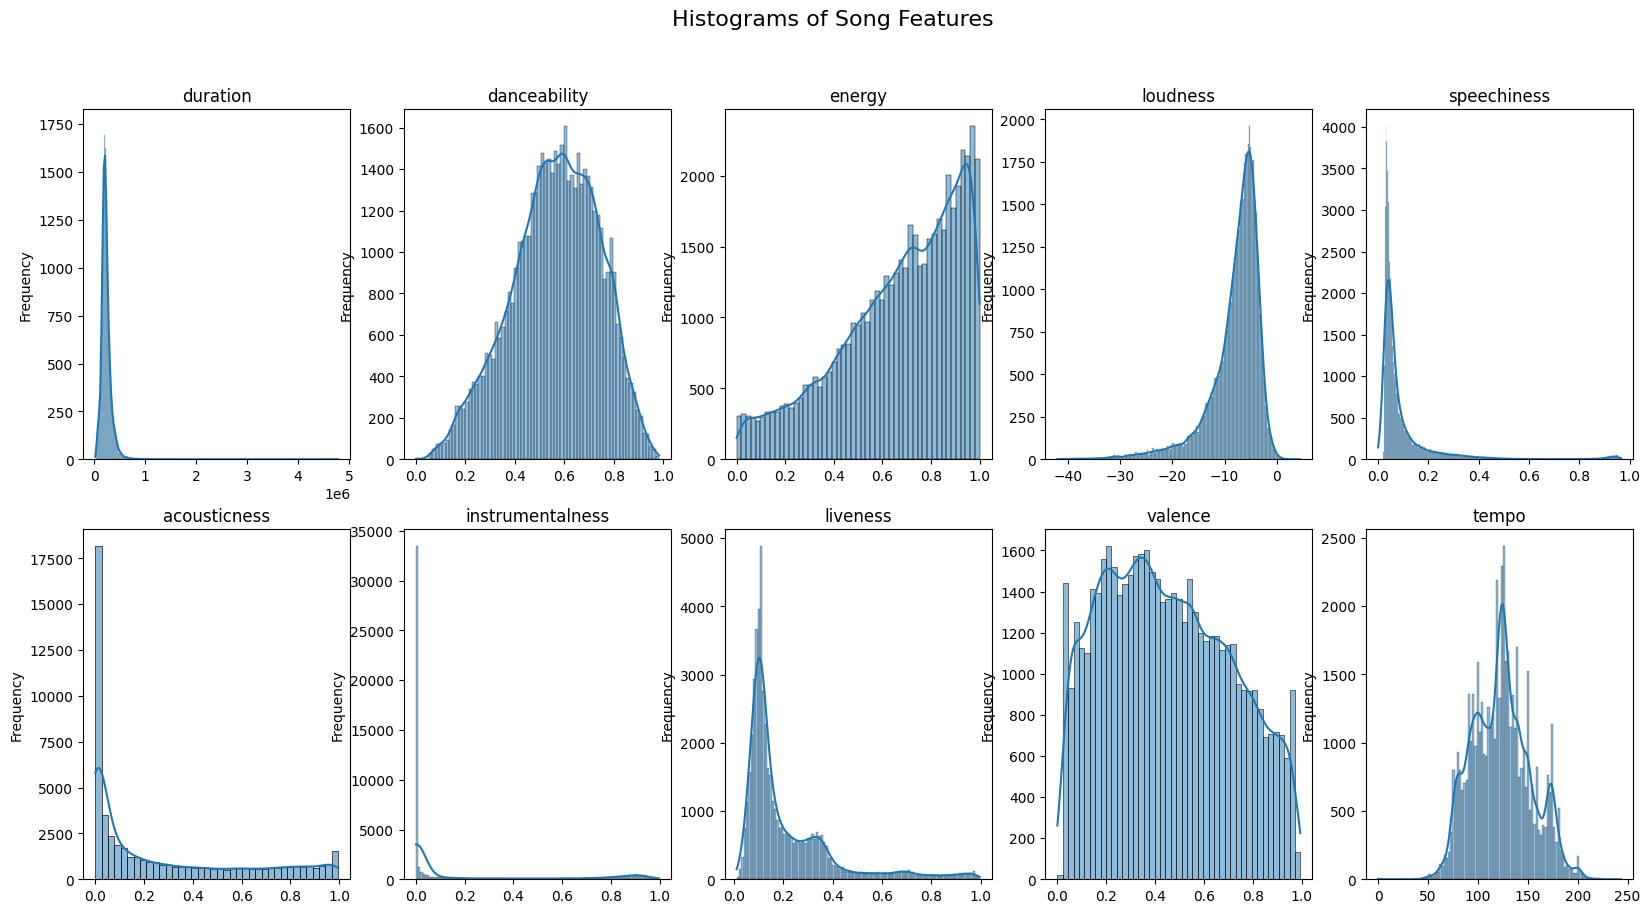

In [ ]:
#Plot histograms for each feature
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Histograms of Song Features', fontsize=16)

for ax, feature in zip(axes.flatten(), features):
    sns.histplot(clean_data[feature], kde=True, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.show();

Is there a relationship between song length and popularity of a song? If so, if the relationship positive or negative?

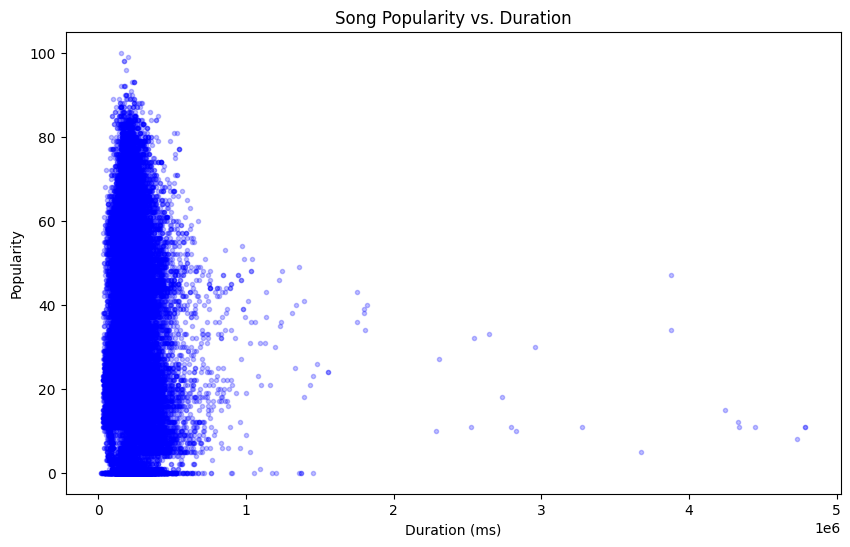

In [ ]:
#Plot Duration v. Popularity
plt.figure(figsize=(10, 6))
plt.plot(clean_data['duration'], clean_data['popularity'],'b.',alpha=0.25,)
plt.title('Song Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show();

Are explicitly rated songs more popular than songs that are not explicit? [Suggestion: Do a suitable significance test, be it parametric, non-parametric or permutation]

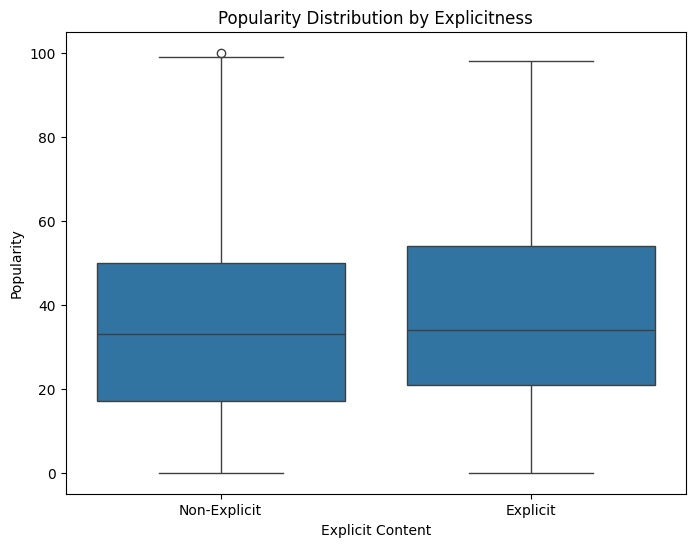

In [ ]:
#Plot popularity boxplots for explicit and non-explicit songs
plt.figure(figsize=(8, 6))
sns.boxplot(x=clean_data['explicit'], y=clean_data['popularity'])
plt.title('Popularity Distribution by Explicitness')
plt.xlabel('Explicit Content')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Non-Explicit', 'Explicit'])
plt.show();

In [ ]:
from scipy.stats import mannwhitneyu
#Extract popularity scores for explicit and non-explicit
explicit_popular = clean_data[clean_data['explicit']]['popularity']
non_explicit_popular = clean_data[~clean_data['explicit']]['popularity']

#Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(explicit_popular, non_explicit_popular, alternative='two-sided')
stat, p_value

(139361273.5, 3.0679199339114678e-19)

Are songs in major key more popular than songs in minor key?

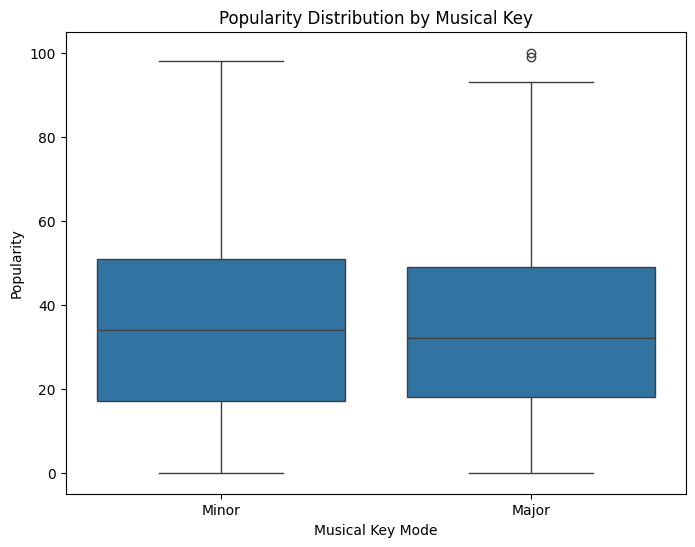

In [ ]:
#Plot popularity boxplots for major and minor keys
plt.figure(figsize=(8, 6))
sns.boxplot(x=clean_data['mode'], y=clean_data['popularity'])
plt.title('Popularity Distribution by Musical Key')
plt.xlabel('Musical Key Mode')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Minor', 'Major'])
plt.show();

In [ ]:
#Extract popularity scores
major_popular = clean_data[clean_data['mode'] == 1]['popularity']
minor_popular = clean_data[clean_data['mode'] == 0]['popularity']

#Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(major_popular, minor_popular, alternative='two-sided')
stat, p_value

(309702373.0, 2.0175287554899416e-06)

Energy is believed to largely reflect the “loudness” of a song. Can you substantiate (or refute) that this is the case? [Suggestion: Include a scatterplot]

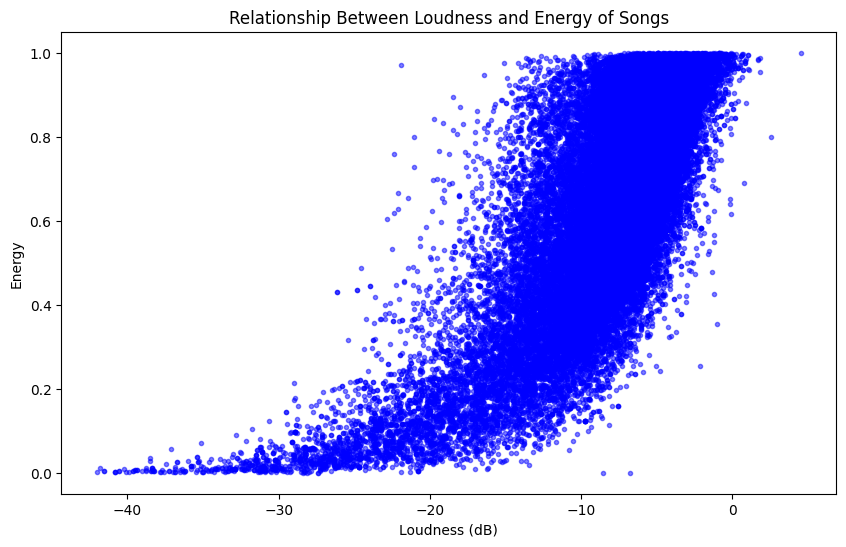


Correlation Coefficient:  0.7748808291850185


In [ ]:
#Plot Energy v Loudness
plt.figure(figsize=(10, 6))
plt.plot(clean_data['loudness'], clean_data['energy'], 'b.',alpha=0.5)
plt.title('Relationship Between Loudness and Energy of Songs')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.show()
print()
#Calculate correlation coefficient
corr_coeff = clean_data['loudness'].corr(clean_data['energy'])
print('Correlation Coefficient: ', corr_coeff)

Which of the 10 individual (single) song features from question 1 predicts popularity best? How good is this “best” model?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model = LinearRegression()

#Dictionary to store R^2 values for each feature
r2_scores = {}

#Iterate over each feature
for feature in features:
    X = clean_data[[feature]]
    y = clean_data['popularity']

    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16594496)

    #model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    #Calculate R^2
    r2 = r2_score(y_test, y_pred)
    r2_scores[feature] = r2

r2_scores

{'duration': 0.0023361049392560673,
 'danceability': 0.0015540973100682809,
 'energy': 0.0034954514352990573,
 'loudness': 0.0016897087518026321,
 'speechiness': 0.0023211021272008248,
 'acousticness': 0.0006776756600284095,
 'instrumentalness': 0.01717799688778998,
 'liveness': 0.0018870410280088512,
 'valence': 0.001513821091213341,
 'tempo': -7.585912446783638e-05}

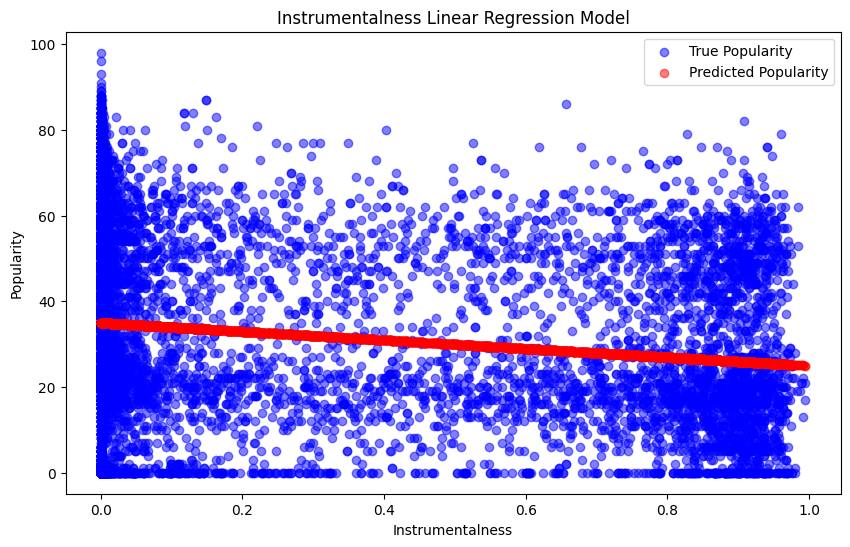

In [ ]:
#plot of just instrumentalness
#Selecting the feature 'instrumentalness' and target 'popularity'
X_instrumentalness = clean_data[['instrumentalness']]
y_popularity = clean_data['popularity']

#split
X_train_instrumentalness, X_test_instrumentalness, y_train_popularity, y_test_popularity = train_test_split(
    X_instrumentalness, y_popularity, test_size=0.3, random_state=16594496)

#build model
model_instrumentalness = LinearRegression()
model_instrumentalness.fit(X_train_instrumentalness, y_train_popularity)

y_pred_instrumentalness = model_instrumentalness.predict(X_test_instrumentalness)

#calculate r^2
r2_instrumentalness = model_instrumentalness.score(X_test_instrumentalness, y_test_popularity)

#Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_instrumentalness, y_test_popularity, color='blue', label='True Popularity', alpha=0.5)
plt.scatter(X_test_instrumentalness, y_pred_instrumentalness, color='red', label='Predicted Popularity', alpha=0.5)
z = np.polyfit(X_test_instrumentalness.squeeze(), y_pred_instrumentalness, 1)
p = np.poly1d(z)
plt.plot(X_test_instrumentalness, p(X_test_instrumentalness), "r--")
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness Linear Regression Model')
plt.legend()
plt.show();

How well can you predict popularity now? How much (if at all) is this model improved? How do you account for this?

In [ ]:
X_features = clean_data[features]
y = clean_data['popularity']

#split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=16594496)

#model
model_features = LinearRegression()
model_features.fit(X_train, y_train)

y_pred = model_features.predict(X_test)

#Calculate R^2 score
r2_features = r2_score(y_test, y_pred)
r2_features

0.04176497287535974

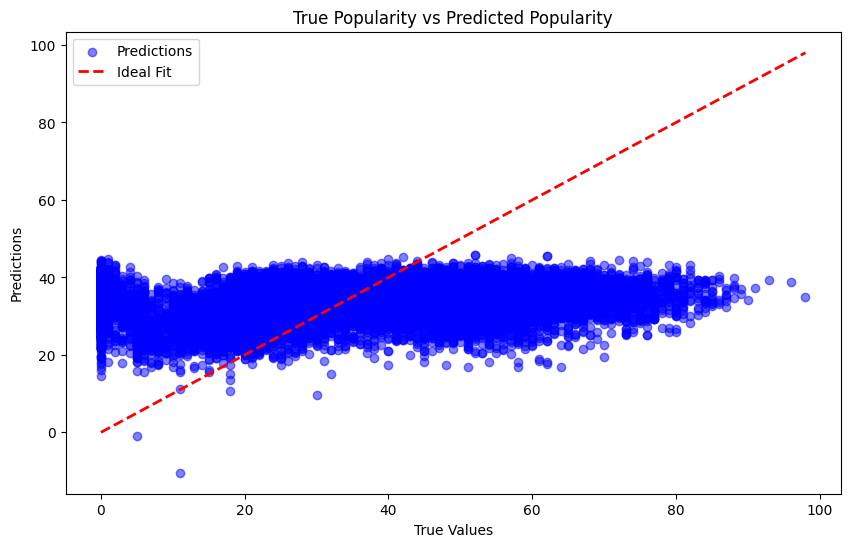

In [ ]:
###Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Popularity vs Predicted Popularity')
plt.legend()
plt.show();

When considering the 10 song features above, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_data[features])

pca = PCA(n_components=len(features))
pca.fit(X_scaled)

#Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

explained_variance_ratio, cumulative_variance_ratio

(array([0.2733881 , 0.16173598, 0.13845787, 0.0979588 , 0.08752094,
        0.08148307, 0.06782686, 0.0471572 , 0.03131337, 0.01315782]),
 array([0.2733881 , 0.43512407, 0.57358194, 0.67154074, 0.75906168,
        0.84054475, 0.90837161, 0.95552881, 0.98684218, 1.        ]))

In [ ]:
#Extract
component = pca.components_

#Make df to interpret
component_df = pd.DataFrame(component, columns=features, index=[f"Component {i+1}" for i in range(len(features))])
component_df

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Component 1,-0.028965,-0.154893,-0.536818,-0.539108,-0.067178,0.474215,0.271022,-0.109100,-0.209770,-0.193923
Component 2,0.292382,-0.568718,0.191436,0.039442,-0.144096,-0.240438,0.328317,0.070635,-0.548774,0.245683
Component 3,-0.072764,-0.187694,0.054129,-0.028588,0.651549,0.179810,-0.141269,0.667588,-0.132136,-0.125662
Component 4,0.825716,0.316386,0.026530,-0.054447,0.122227,-0.083023,0.185669,0.056963,0.066427,-0.387895
Component 5,0.260080,0.132779,-0.090295,-0.190998,0.173113,0.178322,0.139748,0.093122,0.299710,0.830843
Component 6,0.382633,-0.226342,-0.225206,0.099687,-0.236105,0.216769,-0.788553,0.002284,-0.099085,0.085629
Component 7,0.020036,0.135319,-0.011650,0.079006,0.608649,0.001738,-0.137100,-0.639998,-0.406679,0.103301
Component 8,0.102726,-0.635406,0.202486,-0.027648,0.219257,0.115002,0.044635,-0.336289,0.583232,-0.165532
Component 9,-0.038515,-0.074357,-0.166891,-0.614946,0.104927,-0.706865,-0.262880,0.012319,0.083688,0.006933
Component 10,0.009260,-0.144210,-0.737350,0.521961,0.141484,-0.293958,0.181891,0.051697,0.144141,0.005232


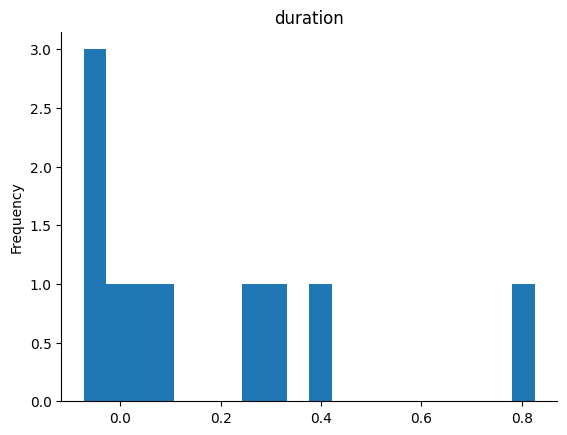

In [ ]:
# @title duration

from matplotlib import pyplot as plt
components_df['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

X_valence = clean_data[['valence']]
y_mode = clean_data['mode']

#split
X_train_valence, X_test_valence, y_train_mode, y_test_mode = train_test_split(X_valence, y_mode, test_size=0.3, random_state=16594496)

#model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_valence, y_train_mode)

y_pred_mode = logistic_model.predict(X_test_valence)
y_pred_proba_mode = logistic_model.predict_proba(X_test_valence)[:, 1]  #probabilities for ROC-AUC

#Evaluate model
accuracy = accuracy_score(y_test_mode, y_pred_mode)
roc_auc = roc_auc_score(y_test_mode, y_pred_proba_mode)

print(f'Accuracy: {accuracy}\n ROC_AUC: {roc_auc}\n Logistic Coeff: {logistic_model.coef_}\n Logistic Intercept: {logistic_model.intercept_}')

Accuracy: 0.6231410256410257
 ROC_AUC: 0.5048704142391921
 Logistic Coeff: [[0.1153066]]
 Logistic Intercept: [0.44944374]


Can you predict whether a song is in major or minor key from valence? If so, how good is this prediction? If not, is there a better predictor?

In [ ]:
#prepare data
X_valence = clean_data[['valence']]
y_mode = clean_data['mode']

#split
X_train_valence, X_test_valence, y_train_mode, y_test_mode = train_test_split(X_valence, y_mode, test_size=0.3, random_state=16594496)

#model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_valence, y_train_mode)

y_pred_mode = logistic_model.predict(X_test_valence)
y_pred_proba_mode = logistic_model.predict_proba(X_test_valence)[:, 1]  #probabilities for ROC-AUC

#Evaluate
accuracy = accuracy_score(y_test_mode, y_pred_mode)
roc_auc = roc_auc_score(y_test_mode, y_pred_proba_mode)

print(f'Accuracy:{accuracy}\n ROC-AUC: {roc_auc}\n Model Coeff: {logistic_model.coef_}\n Model Intercept: {logistic_model.intercept_}')


Accuracy:0.6231410256410257
 ROC-AUC: 0.5048704142391921
 Model Coeff: [[0.1153066]]
 Model Intercept: [0.44944374]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


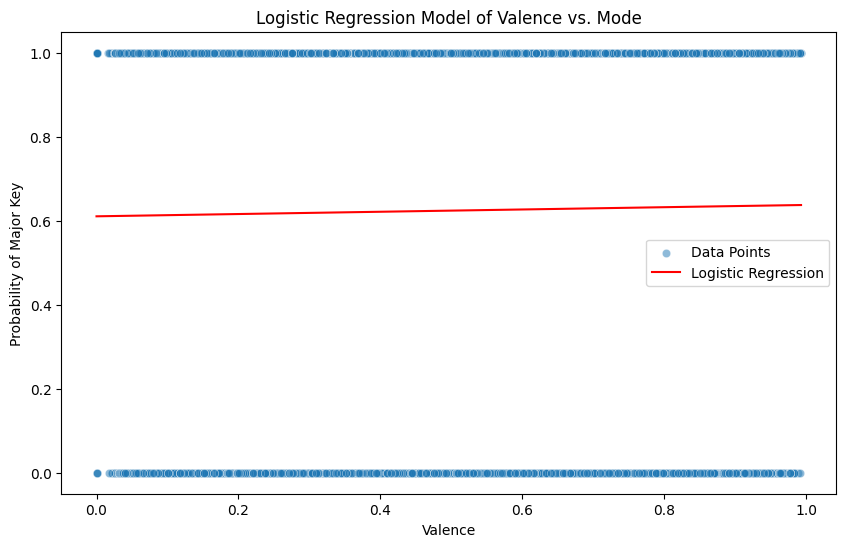

In [ ]:
###Plot the regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_valence['valence'], y=y_train_mode, alpha=0.5, label='Data Points')

#Generate a range of x values
valence_range = np.linspace(X_train_valence['valence'].min(), X_train_valence['valence'].max(), 300).reshape(-1, 1)

#Predict probabilities for new values
predicted_probabilities = logistic_model.predict_proba(valence_range)[:, 1]

#Plot logistic regression curve
plt.plot(valence_range, predicted_probabilities, color='red', label='Logistic Regression')
plt.title('Logistic Regression Model of Valence vs. Mode')
plt.xlabel('Valence')
plt.ylabel('Probability of Major Key')
plt.legend()
plt.show();

Which is a better predictor of whether a song is classical music – duration or the principal components you extracted?

In [ ]:
#Convert 'track_genre' to binary (1  classical, 0 not classical)
clean_data['is_classical'] = (clean_data['track_genre'] == 'classical').astype(int)

#Prepare data
X_duration = clean_data[['duration']]
y_genre = clean_data['is_classical']

##Duration
  #Split
X_train_duration, X_test_duration, y_train_genre, y_test_genre = train_test_split(X_duration, y_genre, test_size=0.3, random_state=16594496)

  #model
duration_model = LogisticRegression()
duration_model.fit(X_train_duration, y_train_genre)

y_pred_duration = duration_model.predict(X_test_duration)

  #evaluate
duration_accuracy = accuracy_score(y_test_genre, y_pred_duration)
duration_roc = roc_auc_score(y_test_genre, duration_model.predict_proba(X_test_duration)[:, 1])

##PCA
X_pca_components = pd.DataFrame(X_scaled.dot(pca.components_.T), columns=[f"PC{i+1}" for i in range(len(features))])

  #Split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_components, y_genre, test_size=0.3, random_state=16594496)

  #model
pca_model = LogisticRegression(max_iter=1000)
pca_model.fit(X_train_pca, y_train_pca)

y_pred_pca = pca_model.predict(X_test_pca)

  #evaluate
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)
pca_roc = roc_auc_score(y_test_pca, pca_model.predict_proba(X_test_pca)[:, 1])

#Display Results
print(f'Duration Accuracy:{duration_accuracy}\n Duraction ROC:{duration_roc}\n PCA Accuracy:{pca_accuracy}\n PCA ROC:{pca_roc}\n')

Duration Accuracy:0.9815384615384616
 Duraction ROC:0.5689652904766052
 PCA Accuracy:0.9821153846153846
 PCA ROC:0.9677449785208406



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


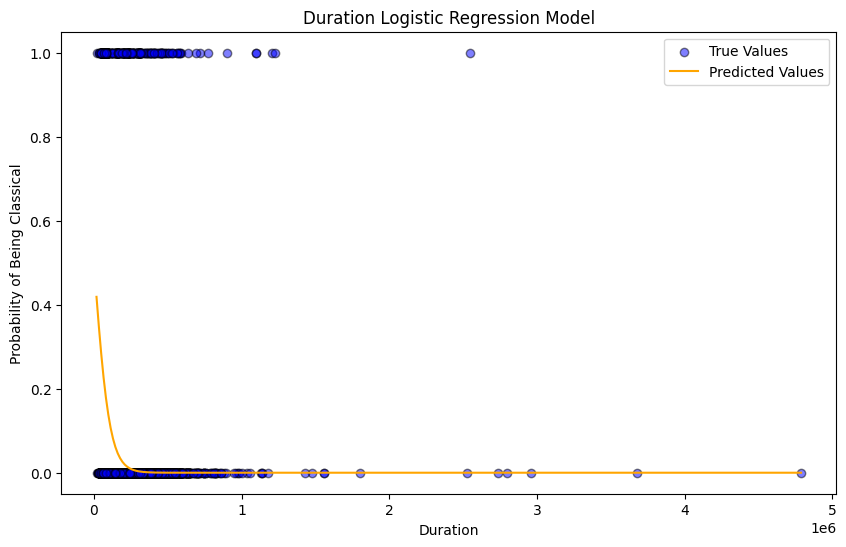

In [ ]:
###plot
#Generate a range of duration values for plotting
duration_range = np.linspace(X_train_duration['duration'].min(), X_train_duration['duration'].max(), 300).reshape(-1, 1)

#Predict probabilities for x range
duration_predicted = duration_model.predict_proba(duration_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_duration, y_test_genre, color='blue', label='True Values', alpha=0.5, edgecolor='k')
plt.plot(duration_range, duration_predicted, color='orange', label='Predicted Values')
plt.xlabel('Duration')
plt.ylabel('Probability of Being Classical')
plt.title('Duration Logistic Regression Model')
plt.legend()
plt.show();